In this notebook are all the tools I need to load in a MEGAlib simulation for a given detector geometry, specified in the directory MEGAlib/geo/ ... look at the config.yaml file in order to determine which geometry file is currently being tested, and manipulated in there along with other factors to test.

Part I 
------

Creating .source files

In [1]:
import os

In [ ]:
pwd

In [ ]:
#change the directory so gz files immediately go where I want them to.




In [2]:
#import the simgenerator
import simGenerator



In [3]:
#use proper directory, and create a configureator object.
testdir = '/Users/noahkasmanoff/BurstCube/Simulation/MEGAlib/test/'

noahdir = '/Users/noahkasmanoff/BurstCube/Simulation/MEGAlib/test/noahcube/'  #dir for my version
controldir = '/Users/noahkasmanoff/BurstCube/Simulation/MEGAlib/test/control/' #dir for control (no plating etc.)

confnoah = simGenerator.configurator(testdir+'configNoah.yaml')  #sampling throughout sky, const E
confreg = simGenerator.configurator(testdir+'config.yaml')
confnoahE = simGenerator.configurator(testdir+'configENoah.yaml')  #sampling energies, const pos
confregE = simGenerator.configurator(testdir+'configE.yaml')

In [16]:
sfs = simFiles(testdir+'configENoah.yaml')

Loading $BURSTCUBE/Simulation/MEGAlib/test/noahcube//BurstCube_20.000keV_0.00ze_0.00az.inc1.id1.sim


FileNotFoundError: [Errno 2] No such file or directory: 'CalorimeterCSIProperties.det'

In [ ]:
confnoahE.config

In [ ]:
#an action taken by the configurator, create source files. 
confnoah.createSourceFiles(noahdir)
confreg.createSourceFiles(controldir)
confnoahE.createSourceFiles(noahdir)
confregE.createSourceFiles(controldir)

In [4]:
import runSims

In [ ]:
runSims.runCosima?

Take the most recent geometry file, and run a simulation of effective area, energy, all plots etc with 1000 events 

as I add features, want to continously compare to the base version of it.

Using a compare function in the plot tools that does this. 



In [ ]:
os.chdir(noahdir)


In [ ]:
pwd

In [ ]:
os.chdir(noahdir)

files = os.listdir(noahdir)
for file in files:
    if file[-1] == 'e': #one way to find a sim
        print('file: ' + file)
        runSims.runCosima(noahdir + file)
    

In [ ]:
os.chdir(controldir)

files = os.listdir(controldir)
for file in files:
    if file[-1] == 'e': #one way to find a sim
        print('file: ' + file)
        runSims.runCosima(controldir + file)

Part 3
-----

Plotting results

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
from plotSim import plotAeffComparison, plotThetaComparison
from bcSim import simFiles
from glob import glob

In [10]:
config_files_E = glob(testdir + 'configE*.yaml')

In [11]:
config_files_E

['/Users/noahkasmanoff/BurstCube/Simulation/MEGAlib/test/configE.yaml',
 '/Users/noahkasmanoff/BurstCube/Simulation/MEGAlib/test/configENoah.yaml',
 '/Users/noahkasmanoff/BurstCube/Simulation/MEGAlib/test/configEsilicone.yaml',
 '/Users/noahkasmanoff/BurstCube/Simulation/MEGAlib/test/configEteflon.yaml']

In [ ]:
del config_files_E[-1]

In [21]:
names = ['Control','Metal Plate','silicone',
        'Teflon']

In [19]:
geodir = '/Users/noahkasmanoff/BurstCube/Simulation/MEGAlib/geo/'
os.chdir(geodir)
sims_E = [simFiles(config_file) for config_file in config_files_E]

Loading $BURSTCUBE/Simulation/MEGAlib/test/control//BurstCube_20.000keV_0.00ze_0.00az.inc1.id1.sim
Loading $BURSTCUBE/Simulation/MEGAlib/test/control//BurstCube_25.129keV_0.00ze_0.00az.inc1.id1.sim
Loading $BURSTCUBE/Simulation/MEGAlib/test/control//BurstCube_31.573keV_0.00ze_0.00az.inc1.id1.sim
Loading $BURSTCUBE/Simulation/MEGAlib/test/control//BurstCube_39.669keV_0.00ze_0.00az.inc1.id1.sim
Loading $BURSTCUBE/Simulation/MEGAlib/test/control//BurstCube_49.841keV_0.00ze_0.00az.inc1.id1.sim
Loading $BURSTCUBE/Simulation/MEGAlib/test/control//BurstCube_62.622keV_0.00ze_0.00az.inc1.id1.sim
Loading $BURSTCUBE/Simulation/MEGAlib/test/control//BurstCube_78.681keV_0.00ze_0.00az.inc1.id1.sim
Loading $BURSTCUBE/Simulation/MEGAlib/test/control//BurstCube_98.858keV_0.00ze_0.00az.inc1.id1.sim
Loading $BURSTCUBE/Simulation/MEGAlib/test/control//BurstCube_124.208keV_0.00ze_0.00az.inc1.id1.sim
Loading $BURSTCUBE/Simulation/MEGAlib/test/control//BurstCube_156.060keV_0.00ze_0.00az.inc1.id1.sim
Loading 

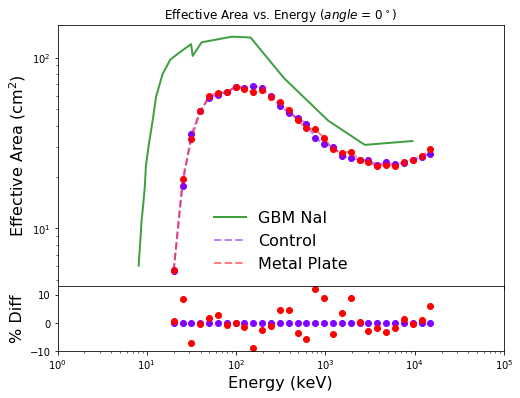

In [29]:
plotAeffComparison(sims_E[:2], names[:2], compareTo='Control')

This is in the /geo directory, do I need to go back to it?

> /Users/noahkasmanoff/BurstCube/Simulation/MEGAlib/bin/bcSim.py(271)getEresFromFile()
    269         eres_lines = []
    270         filename = path.expandvars(filename)
--> 271         with open(filename) as f:
    272             for line in f:
    273                 if commentString not in line:

ipdb> filename
'CalorimeterCSIProperties.det'
ipdb> import os
ipdb> os.getcwd()
'/Users/noahkasmanoff/BurstCube/Simulation/MEGAlib/bin'
ipdb> exit


In [ ]:
config_files_E = glob(testdir + 'configE*.yaml')

In [ ]:
d

In [ ]:
del config_files_E[0]
config_files_E

In [ ]:
names = ['Teflon', 'Silicone']

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
from plotSim import plotAeffComparison, plotThetaComparison
from bcSim import simFiles
from glob import glob

In [ ]:
sims_E = [simFiles(config_file) for config_file in config_files_E]

In [ ]:
plotAeffComparison(sims_E, names, compareTo='Teflon')

In [ ]:
aeffs_E = [sim.calculateAeff(useEres=False) for sim in sims_E]

In [ ]:
aeffs_E

I'd like to point out I am using a much smaller energy range than the one on the given example, but as far as I can tell from here the trend looks correct. Will look more into understanding how to do this for angular dependences next!

In [ ]:
import plotSim

In [ ]:
from bcSim import simFiles


In [ ]:
sfs = simFiles(testdir + 'configsilicone.yaml')

In [ ]:
#Need to iterate through files


In [ ]:
import plotSim

plotSim.plotAeff = all the sim files in here, and that's what I need to use

In [ ]:
import bcSim

In [ ]:
plotSim.plotAeff(sfs)